In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("world_population.csv")
data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [16]:
data.shape

(234, 17)

In [21]:
row_count,column_count=data.shape
print('Rows',row_count)
print('Columns',column_count)

Rows 234
Columns 17


In [ ]:
                                 Features Description:
#Rank: Rank by population
#CCA3: 3 digit Country/Territories code
#Country: Name of the Country/Territories
#Capital: Name of the Capital
#Continent: Name of the Continent
#2022 Population: Population of the Country/Territories in the year 2022
#2020 Population: Population of the Country/Territories in the year 2020
#2015 Population: Population of the Country/Territories in the year 2015
#2010 Population: Population of the Country/Territories in the year 2010
#2000 Population: Population of the Country/Territories in the year 2000
#1990 Population: Population of the Country/Territories in the year 1990
#1980 Population: Population of the Country/Territories in the year 1980
#1970 Population: Population of the Country/Territories in the year 1970
#Area (km²): Area size of the Country/Territories in square kilometer
#Density (per km²): Population density per square kilometer
#Growth Rate: Population growth rate by Country/Territories
#World Population Percentage: The population percentage by each Country/Territories

In [ ]:
## check the numerical and categorical variable

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [ ]:
   ##Categorical variables:
#CCA3 (Assuming it represents the country code, which would be categorical)
#Country/Territory
#Capital
#Continent
     ## continous variables:
#The rest (Population figures, Area, Density, Growth Rate) are continuous variables.

In [11]:
data.select_dtypes(include=np.number).columns

Index(['Rank', '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [7]:
data.select_dtypes(include="object").columns

Index(['CCA3', 'Country/Territory', 'Capital', 'Continent'], dtype='object')

In [9]:
data["CCA3"].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COK',
       'CRI', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA',
       'DOM', 'COD', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP',
       'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR',
       'ITA', 'CIV', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE',
       'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT',
       'MHL', 'MTQ',

In [ ]:
## DESCRIBE FIVE POINT SUMMARY

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020 Population,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015 Population,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010 Population,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000 Population,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990 Population,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980 Population,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970 Population,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (km²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07


In [22]:
## CHECK THE NULL VALUES
# there is no missing value in data 
data.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [23]:
## Exploratory Data Analysis
num=data.select_dtypes(include=np.number).columns
num

Index(['Rank', '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

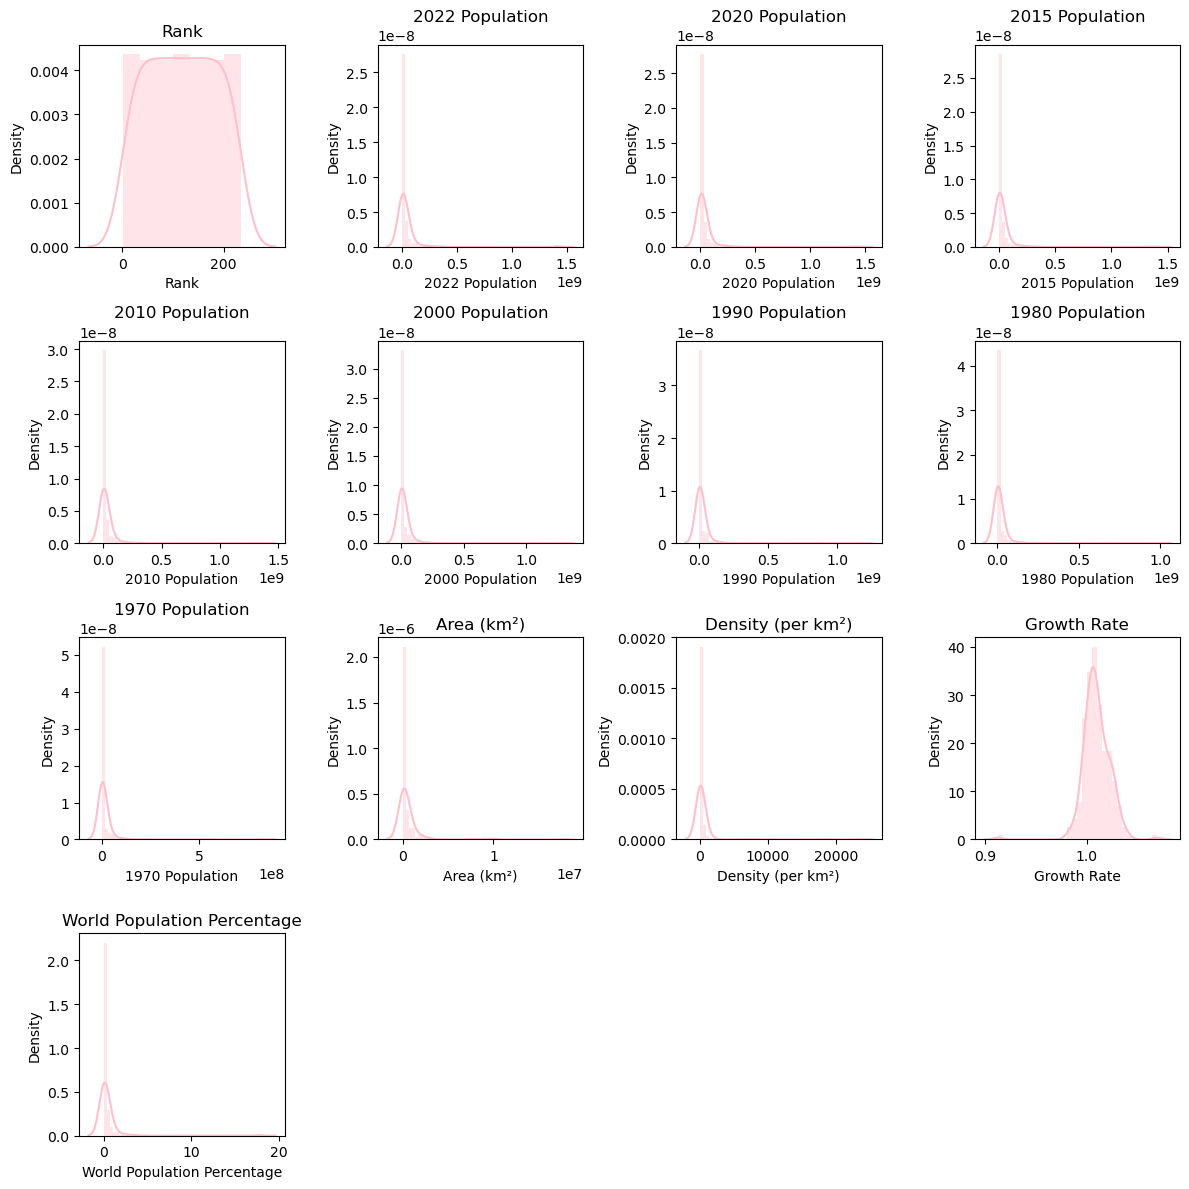

In [33]:
    # UNIVARIATE ANALYSIS FOR NUYMERICAL COLUMN

plt.figure(figsize=(12, 12)) 
t=1
for i in num:
    plt.subplot(4,4,t)
    sns.distplot(data[i],color="pink")
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

In [34]:
data.skew()

Rank                           0.000000
2022 Population                9.151205
2020 Population                9.183501
2015 Population                9.239393
2010 Population                9.287828
2000 Population                9.420456
1990 Population                9.605373
1980 Population                9.657636
1970 Population                9.646466
Area (km²)                     6.082019
Density (per km²)              8.948942
Growth Rate                   -1.101670
World Population Percentage    9.151104
dtype: float64

In [ ]:
## ACCORDING TO THIS WE OBSERVE THE DATA IS RIGHT SKEW ONLY GROWTH RATE IS LEFT SKEW(-VE SKEW)

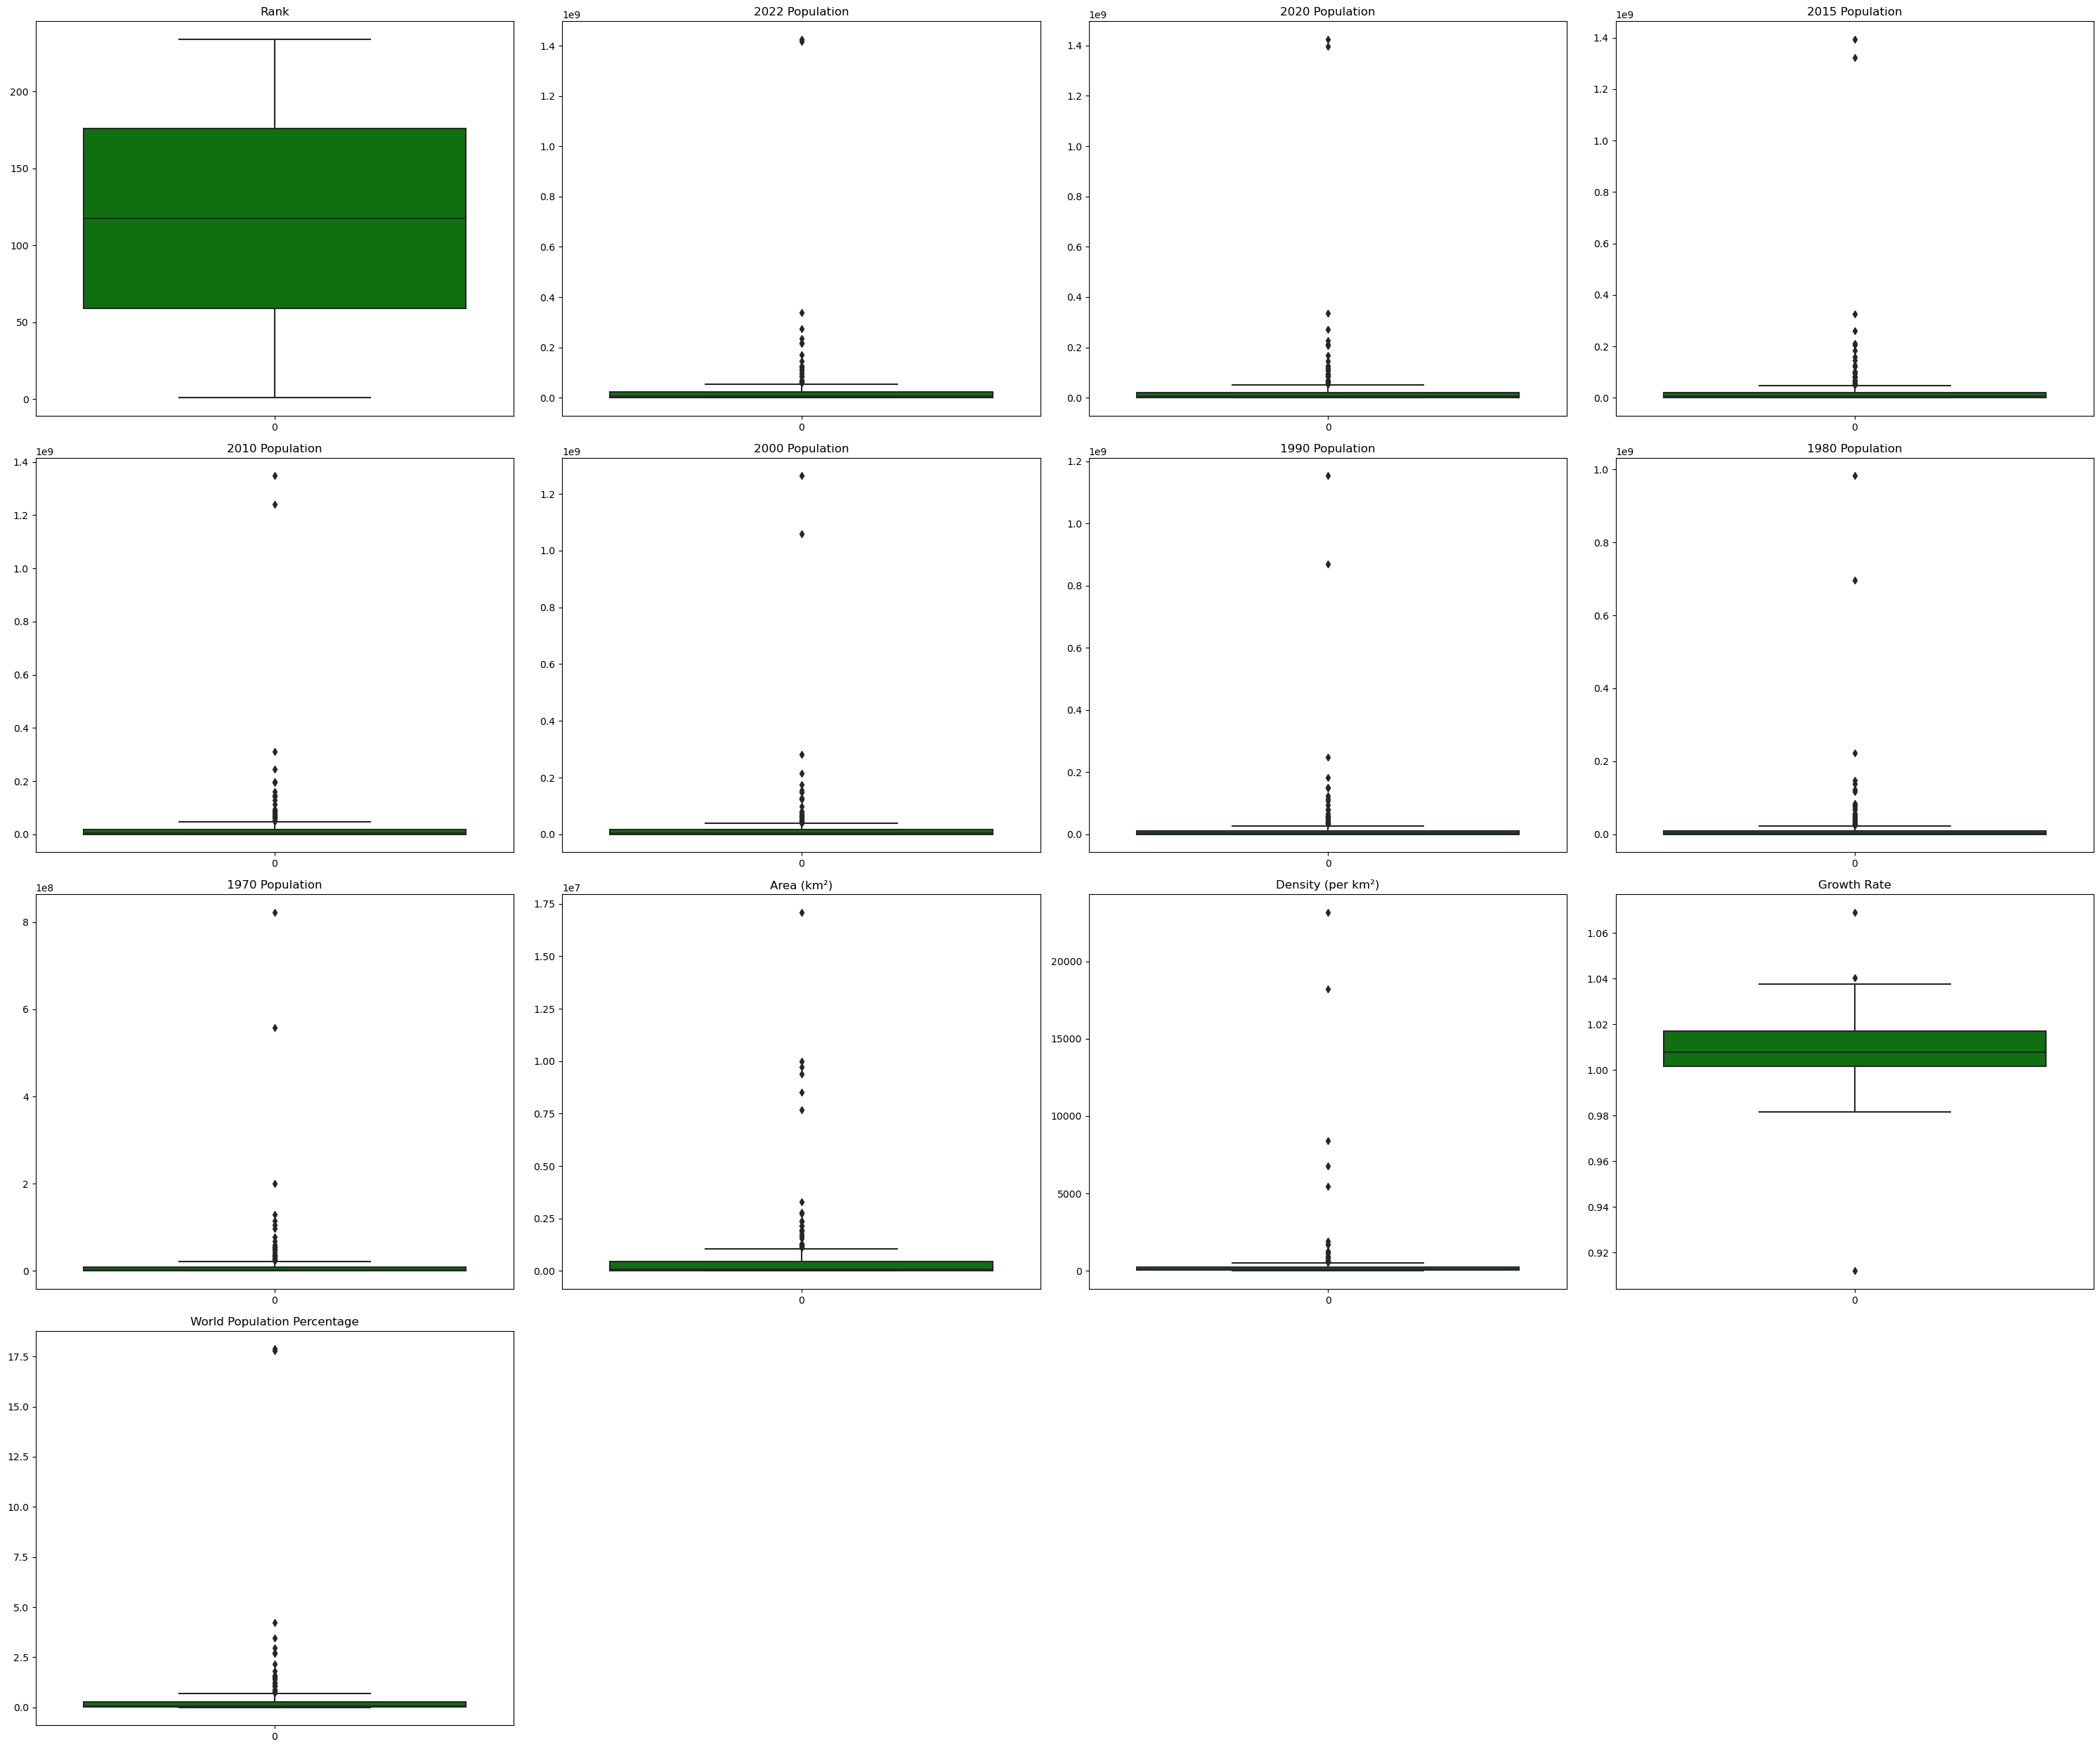

In [38]:
plt.figure(figsize=(30,25))
t=1
for i in num:
    plt.subplot(4,4,t)
    sns.boxplot(data[i],color='green')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

In [ ]:
    ## CHECK OUTLIER
# THERE ARE OUTLIER IN DATA

In [39]:
cat=data.select_dtypes(include="object").columns
cat

Index(['CCA3', 'Country/Territory', 'Capital', 'Continent'], dtype='object')

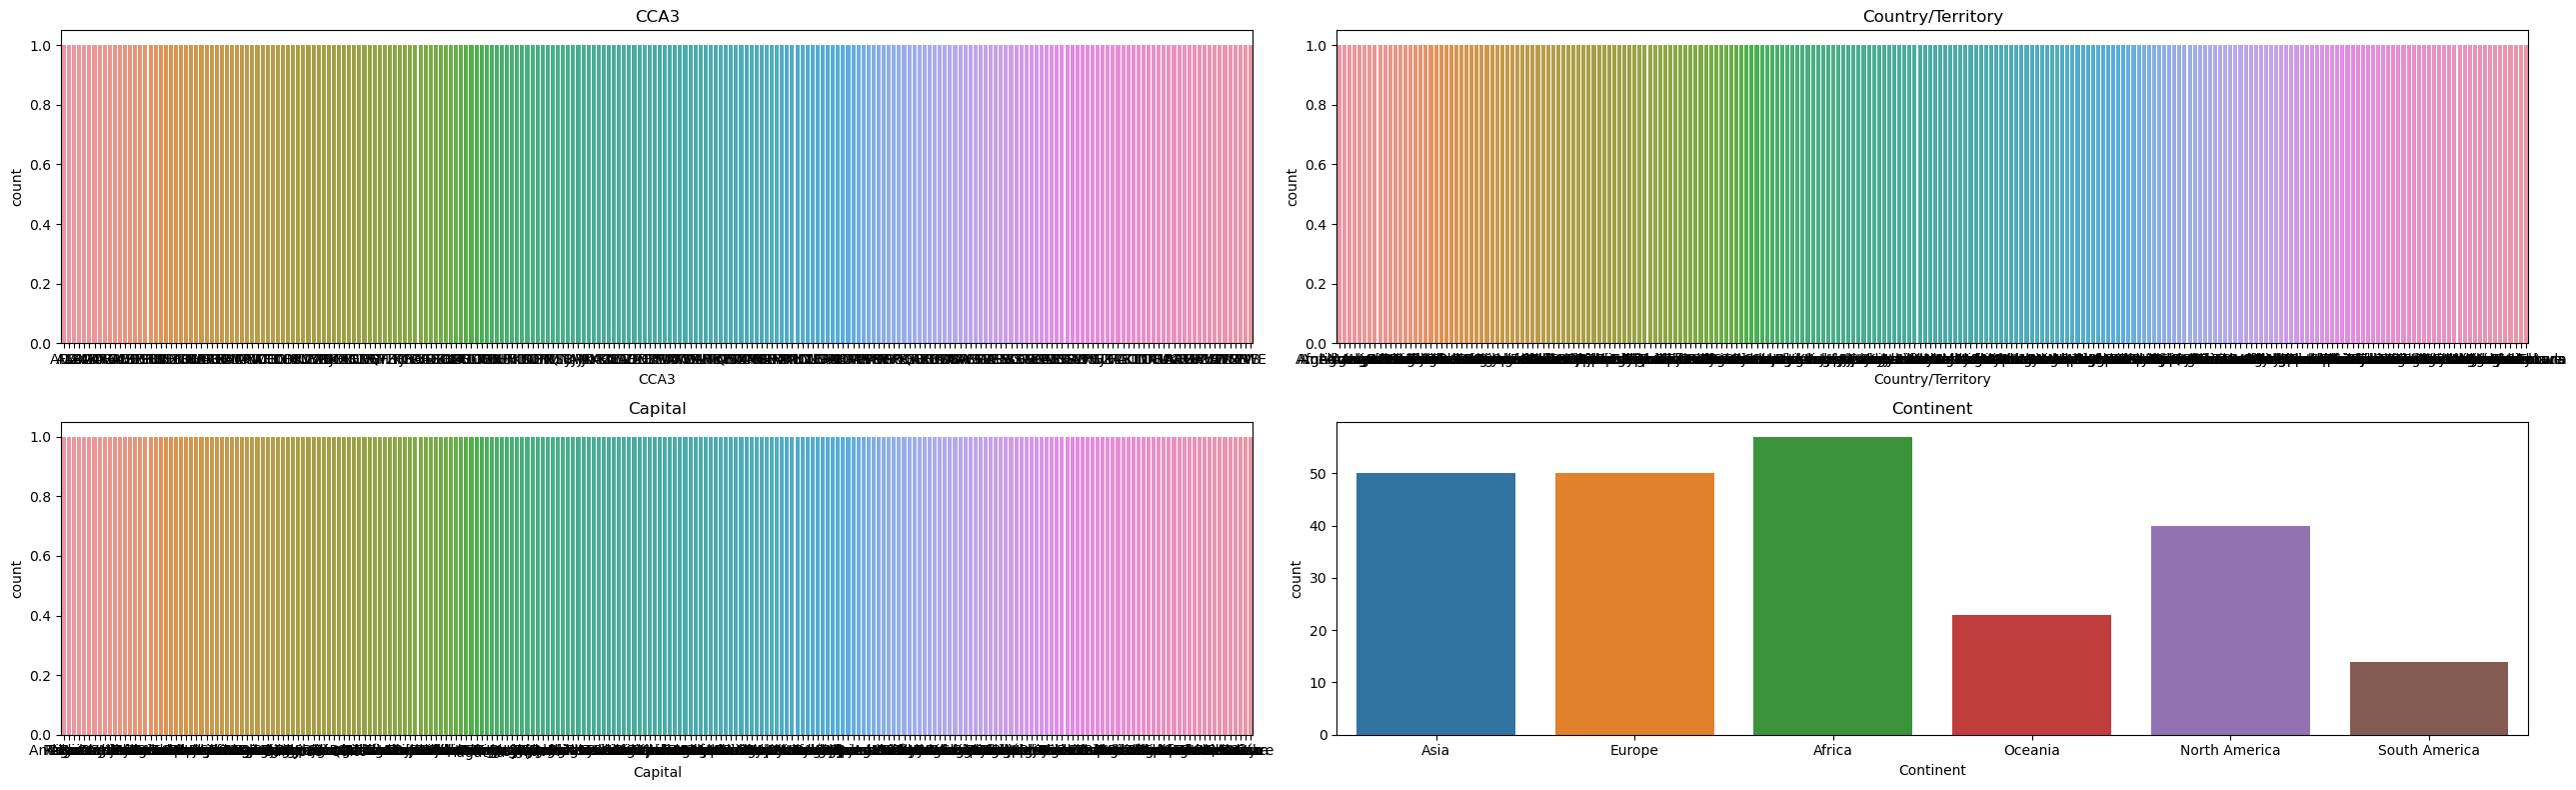

In [40]:
        # CATEGORICAL COLUMNS
    
plt.figure(figsize=(26,8))
t=1
for i in cat:
    plt.subplot(2,2,t)
    sns.countplot(data=data, x=i)
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

<Axes: xlabel='Continent', ylabel='count'>

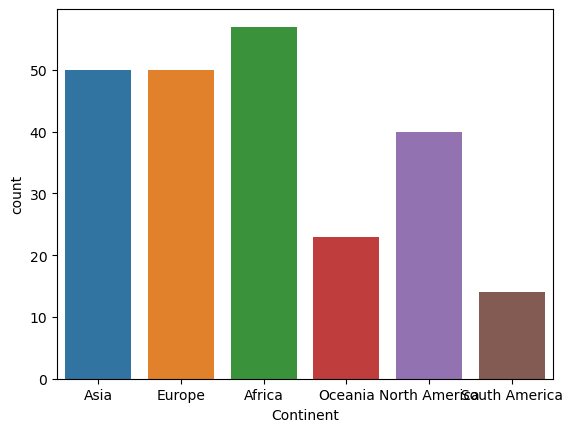

In [42]:
sns.countplot(data=data,x="Continent")

In [ ]:
##  BIVARIATE ANALYSIS

<Axes: >

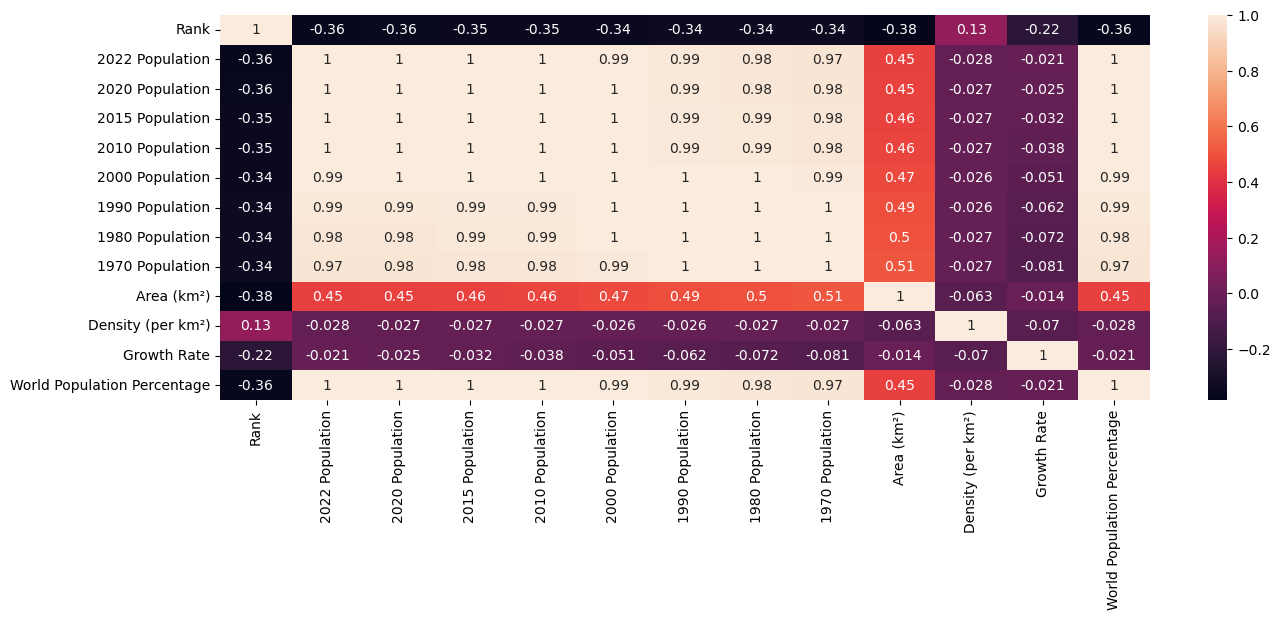

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

In [ ]:
#High correlation between population and world population percentage.
#Also high correlation between country and CCA3 code as expected.
#Medium correlation between area and population.

In [48]:
cat

Index(['CCA3', 'Country/Territory', 'Capital', 'Continent'], dtype='object')

In [ ]:
## BAR PLOT

<Axes: xlabel='Continent', ylabel='World Population Percentage'>

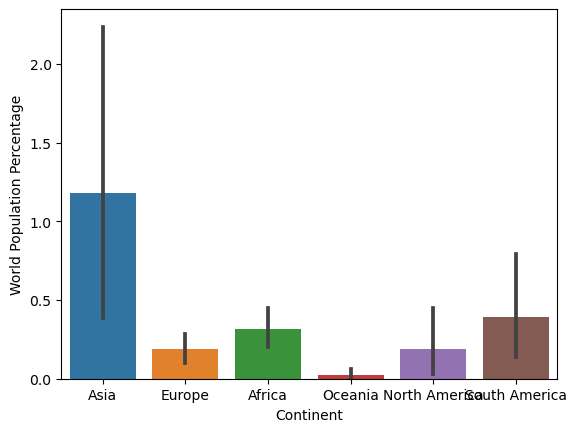

In [50]:
sns.barplot(data=data,x='Continent',y="World Population Percentage")

In [ ]:
## Asia is highest world population percentage
## oceania is lowest world population percentage

<Axes: xlabel='Capital', ylabel='World Population Percentage'>

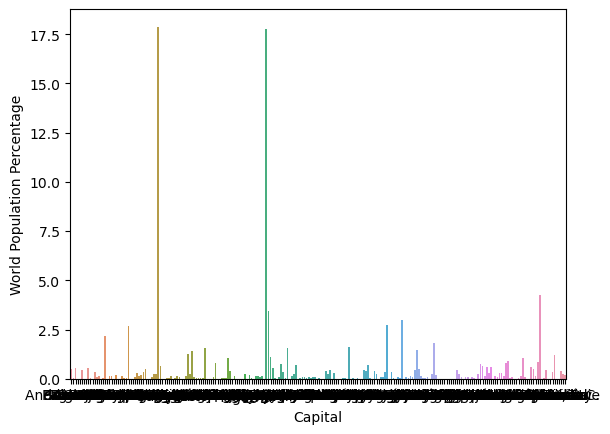

In [51]:
sns.barplot(data=data,x='Capital',y="World Population Percentage")

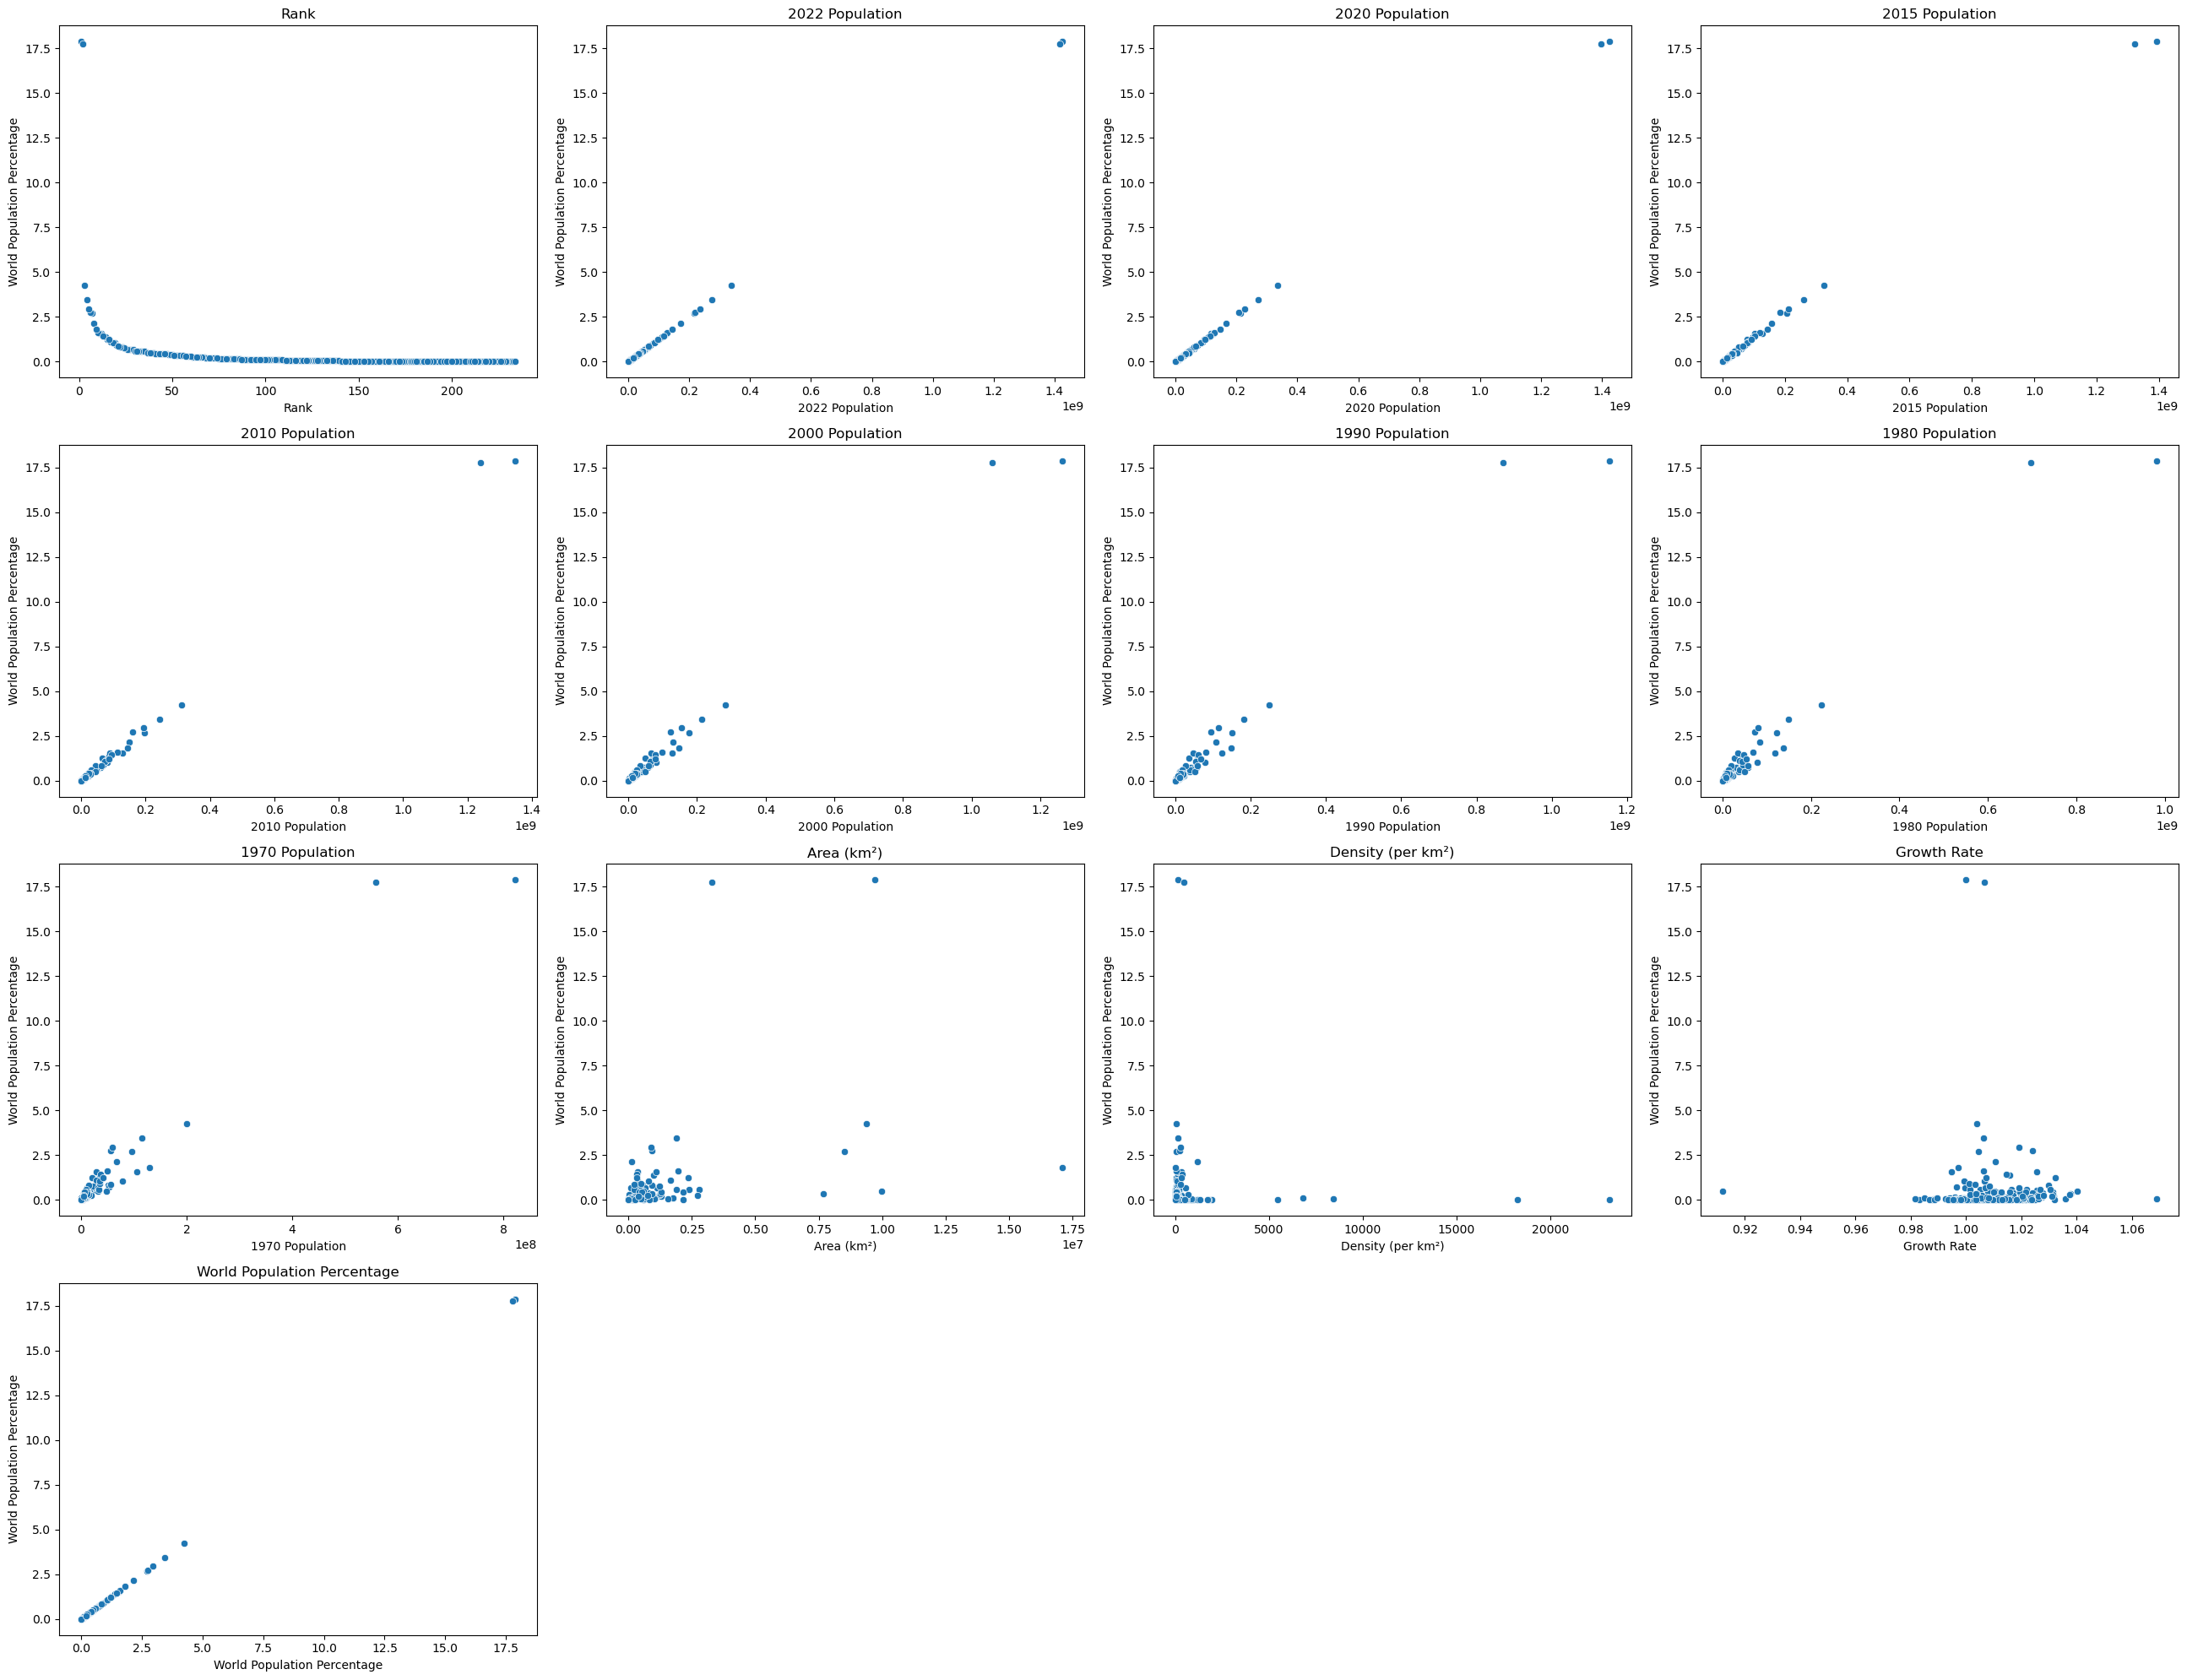

In [54]:
plt.figure(figsize=(26,20))
t=1
for i in num:
    plt.subplot(4,4,t)
    sns.scatterplot(data=data,x=i,y='World Population Percentage')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

In [55]:
## ENCODING CHANGE CATEGORY VARIABLE INTO NUMERICAL
data["Continent"].value_counts()

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64

In [57]:
data["Capital"].value_counts()

Kabul               1
Port Moresby        1
Niamey              1
Abuja               1
Alofi               1
                   ..
Guatemala City      1
Saint Peter Port    1
Conakry             1
Bissau              1
Harare              1
Name: Capital, Length: 234, dtype: int64

In [64]:
features=data.columns

In [65]:
continent_data =  data.groupby('Continent')[features].mean().sort_values(by = "Density (per km²)",ascending = False)
continent_data.style.background_gradient(cmap = "BuGn")

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.560000,94427665.480000,93261730.700000,89165003.640000,84400826.540000,74701792.080000,64211271.540000,52706684.560000,42898125.800000,642762.820000,1025.024136,1.009384,1.183800
Europe,124.500000,14862950.760000,14915843.920000,14830712.160000,14712278.680000,14521868.460000,14406415.940000,13850543.180000,13118479.820000,460208.220000,663.324742,1.002256,0.186600
North America,160.925000,15007403.400000,14855914.825000,14259596.250000,13568016.275000,12151739.600000,10531660.625000,9207334.025000,7885865.150000,606104.450000,272.761757,1.004175,0.187750
Oceania,188.521739,1958198.000000,1910148.956522,1756664.478261,1613163.652174,1357512.086957,1162774.869565,996532.173913,846968.260870,370220.913043,132.543065,1.007383,0.023913
Africa,92.157895,25030367.228070,23871435.263158,21071972.666667,18512773.192982,14367474.245614,11195625.070175,8448006.614035,6411304.350877,531894.087719,125.047646,1.021244,0.313509
South America,97.571429,31201186.285714,30823574.500000,29509599.714286,28077017.857143,24973877.285714,21224743.928571,17270643.285714,13781939.714286,1273813.000000,20.971979,1.007957,0.391429


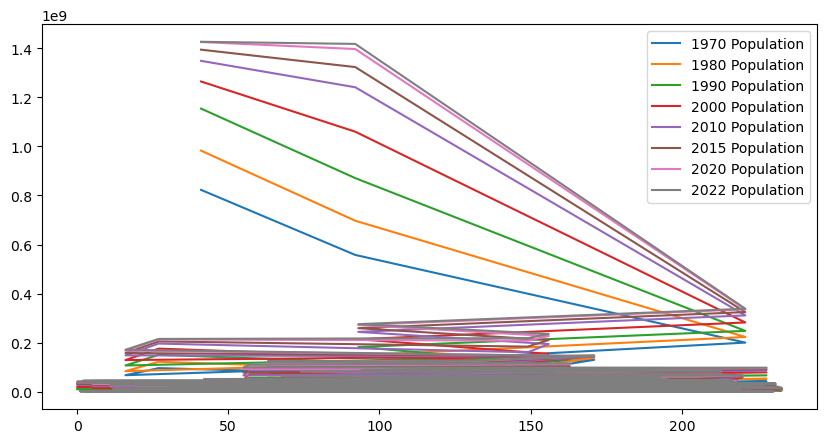

In [66]:
data.sort_values(by = '2022 Population',inplace = True)
plt.figure(figsize = (10,5))
population_features = ['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
population_features.reverse()
for feature in population_features:
    plt.plot(data[feature],label = feature)
plt.legend()
plt.show()